<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Sequential Learning: adversarial bandits
</p><br> 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
HTML("""
<style>
.output_png {
    display: table-cell;
    
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Import agents
from exp3 import EXP3

## Rock-Paper-Scissors environment

In [3]:
# Let's define the RPC environment

L = np.array([
    [0, 1, -1],
    [-1, 0, 1],
    [1, -1, 0]
])
L = (L+1)/2
L

array([[0.5, 1. , 0. ],
       [0. , 0.5, 1. ],
       [1. , 0. , 0.5]])

### Fixed adversary
- Average loss and cumulative regret for $\eta=1$
- Check dependancy on $\eta$

In [4]:
eta = 1
K = 3
q = np.array([1/2, 1/4, 1/4])
T = 100
algo = EXP3(eta, K, L, q)
algo.run(T)

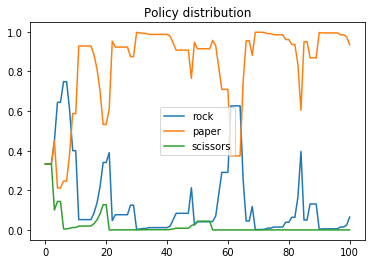

In [5]:
plt.plot(list(zip(*algo.p_list))[0], label='rock')
plt.plot(list(zip(*algo.p_list))[1], label='paper')
plt.plot(list(zip(*algo.p_list))[2], label='scissors')
plt.legend()
plt.title('Policy distribution')
plt.show()

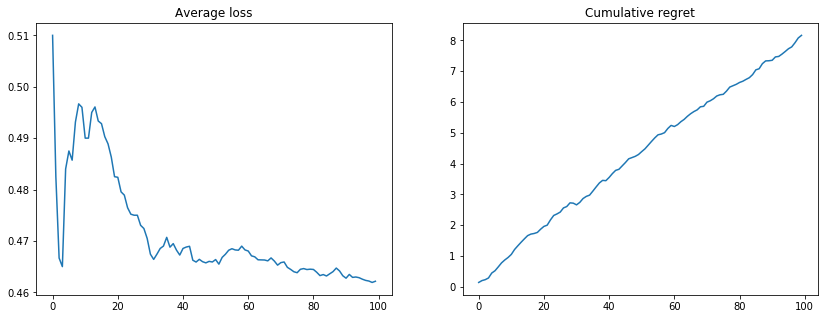

In [6]:
# Average loss and Regret over 100 runs
nb_runs = 100
T = 100
time_steps = np.arange(T)+1
losses, regrets = np.zeros((nb_runs, T)), np.zeros((nb_runs, T))

for i in range(nb_runs):
    algo = EXP3(eta, K, L, q)
    algo.run(T)
    losses[i,:] = algo.loss_list
    regrets[i, :] = algo.regrets
        
# Mean losses
mean_losses = losses.mean(axis=0)
mean_regrets = regrets.mean(axis=0)
        
# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(mean_losses.cumsum()/time_steps)
plt.title('Average loss')

plt.subplot(1, 2, 2)
plt.plot(mean_regrets.cumsum())
plt.title('Cumulative regret')

plt.show()

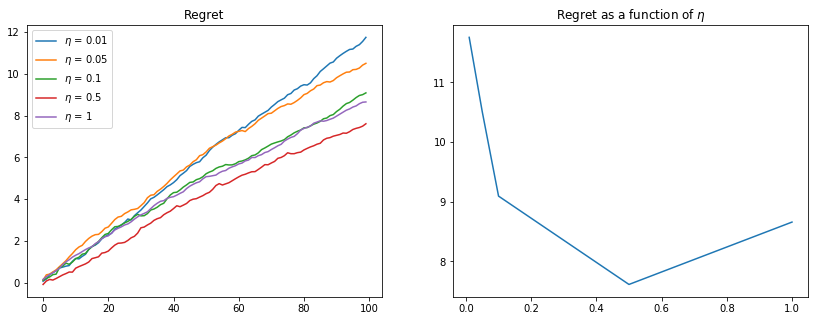

In [7]:
# Dependancy on eta
optimal = np.zeros(T) + 1/4*1/2 + 1/4*1
dict_eta = {}
possible_eta = [0.01, 0.05, 0.1, 0.5, 1]

for eta in possible_eta:
    regrets = np.zeros((nb_runs, T))
    for i in range(nb_runs):
        algo = EXP3(eta, K, L, q)
        algo.run(T)
        regrets[i,:] = algo.regrets
    dict_eta[eta] = regrets.mean(axis=0)

values = [dict_eta[eta].cumsum()[-1] for eta in possible_eta]

# Plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for eta in possible_eta:
    plt.plot(dict_eta[eta].cumsum(), label=f'$\eta$ = {eta}')
plt.title('Regret')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(possible_eta, values)
plt.title('Regret as a function of $\eta$')
    
plt.show()

## Adaptative adversary

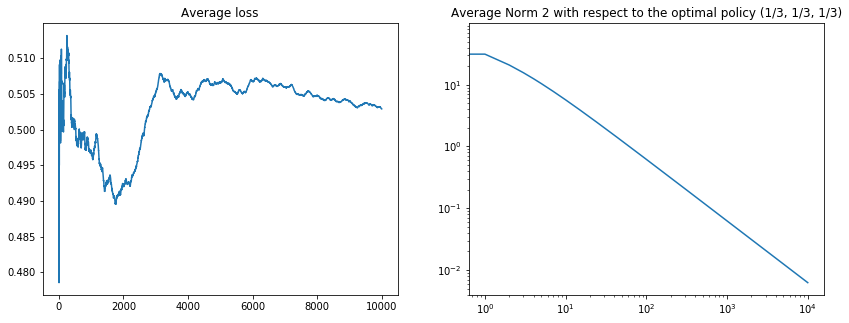

In [8]:
# Average loss and Regret over 20 runs
eta = 0.5
K = 3
q = np.array([1/3, 1/3, 1/3])
T = 10000
nb_runs = 20
time_steps = np.arange(T)+1
optimal = np.zeros(T)
losses, regrets = np.zeros((nb_runs, T)), np.zeros((nb_runs, T))

for i in range(nb_runs):
    algo = EXP3(eta, K, L, q, optimize_adversary=True)
    algo.run(T)
    losses[i,:] = algo.loss_list
    regrets[i,:] = np.cumsum(algo.loss_list - optimal)
        
# Mean losses
mean_losses = losses.mean(axis=0)

# Distance towards optimal policy
norm_2 = np.linalg.norm(np.array(algo.p_list) - np.array([1/3, 1/3, 1/3]))
        
# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(mean_losses)/time_steps)
plt.title('Average loss')

plt.subplot(1, 2, 2)
plt.loglog(np.cumsum(norm_2)/time_steps)
plt.title('Average Norm 2 with respect to the optimal policy (1/3, 1/3, 1/3)')

plt.show()